| **Inicio** | **atrás 14** | **Siguiente 16** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./14_%20Datos_Anomalos.ipynb)| [⏩](./16_manejar_Datos_Valores_Faltantes%20.ipynb)|

# **15. 3 Razones para Discretizar Datos Numéricos y Cómo Discretizar con Pandas de Python**

## **Qué es la discretización**

**Discretización:**

La discretización es un proceso en el cual convertimos variables continuas en variables discretas o categóricas. En otras palabras, agrupamos los valores de una variable continua en intervalos o categorías específicas. Este proceso es útil para simplificar el análisis y para trabajar con algoritmos que requieren datos categóricos en lugar de continuos.

La discretización es comúnmente utilizada en análisis estadísticos, minería de datos y aprendizaje automático cuando deseamos reducir la complejidad de los datos y hacerlos más interpretables.

**Ejemplo de Discretización con Gráficas:**

Supongamos que tenemos un conjunto de datos que representa las edades de un grupo de personas. Queremos discretizar las edades en grupos de rangos, por ejemplo, "joven", "adulto joven" y "adulto mayor".

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


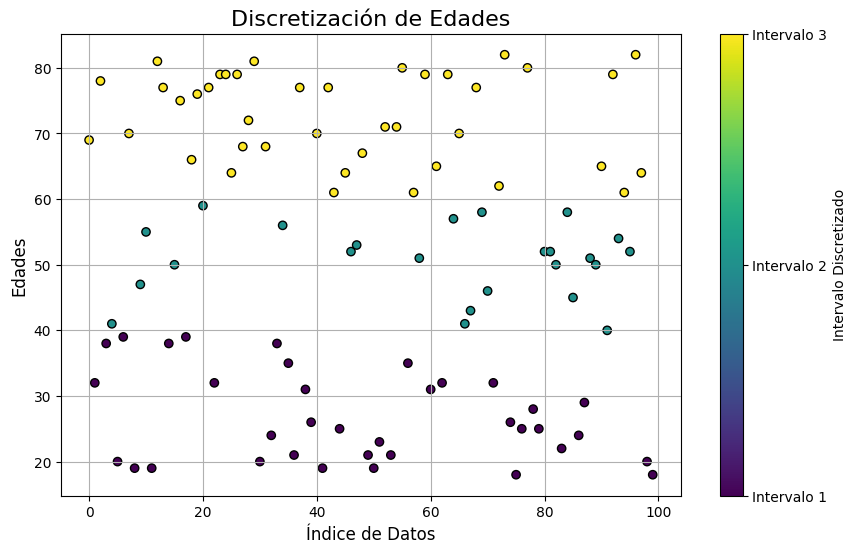

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Crear datos de ejemplo (edades)
np.random.seed(42)
edades = np.random.randint(18, 85, size=100)  # Genera 100 edades aleatorias entre 18 y 85

# Reshape para que sea una matriz 2D
edades_reshape = edades.reshape(-1, 1)

# Discretizar las edades en 3 intervalos usando contenedores uniformes
discretizador = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
edades_discretizadas = discretizador.fit_transform(edades_reshape).flatten()  # Aplanar para usar como colores en el gráfico

# Visualizar los resultados de la discretización
plt.figure(figsize=(10, 6))
plt.scatter(range(len(edades)), edades, c=edades_discretizadas, cmap='viridis', edgecolor='black')
plt.colorbar(label='Intervalo Discretizado', ticks=range(3), format=plt.FuncFormatter(lambda x, _: f'Intervalo {int(x+1)}'))
plt.xlabel('Índice de Datos', fontsize=12)
plt.ylabel('Edades', fontsize=12)
plt.title('Discretización de Edades', fontsize=16)
plt.grid(True)  # Añadir cuadrícula para mejorar la legibilidad
plt.show()

**Explicación:**

1. Generamos un conjunto de datos de edades aleatorias utilizando `np.random.randint`. Luego, visualizamos un histograma para mostrar cómo se distribuyen las edades antes de la discretización.

2. Utilizamos `KBinsDiscretizer` de scikit-learn para realizar la discretización. Configuramos `n_bins` para determinar en cuántos intervalos queremos dividir las edades.

3. Utilizamos `fit_transform` para aplicar la discretización a las edades.

4. Creamos un gráfico de dispersión donde cada punto representa una edad, y su color indica en qué intervalo se encuentra después de la discretización.

**Resultado:**

Verás dos gráficos: el primero muestra el histograma de edades antes de la discretización, y el segundo muestra un gráfico de dispersión donde las edades se han discretizado en tres intervalos. La coloración de los puntos en el segundo gráfico indica en qué intervalo se encuentra cada edad después de la discretización.

La discretización ayuda a simplificar los datos y puede ser útil para reducir la complejidad de un análisis o para ajustarse a requisitos de algoritmos que trabajan mejor con datos categóricos.

## **Discretización con contenedores iguales**

La discretización con contenedores iguales, también conocida como discretización uniforme o en intervalos iguales, es un enfoque donde dividimos el rango de valores de una variable continua en un número específico de intervalos de igual tamaño. Cada intervalo representa una categoría o valor discreto al que asignamos los datos que caen dentro de ese intervalo. Esta técnica es útil cuando deseamos agrupar los valores continuos en categorías equidistantes.

**Ejemplo de Discretización con Contenedores Iguales y Gráficas:**

Vamos a utilizar un ejemplo similar al anterior, donde tenemos un conjunto de datos que representa las edades de un grupo de personas. Sin embargo, en este caso aplicaremos la discretización con contenedores iguales.

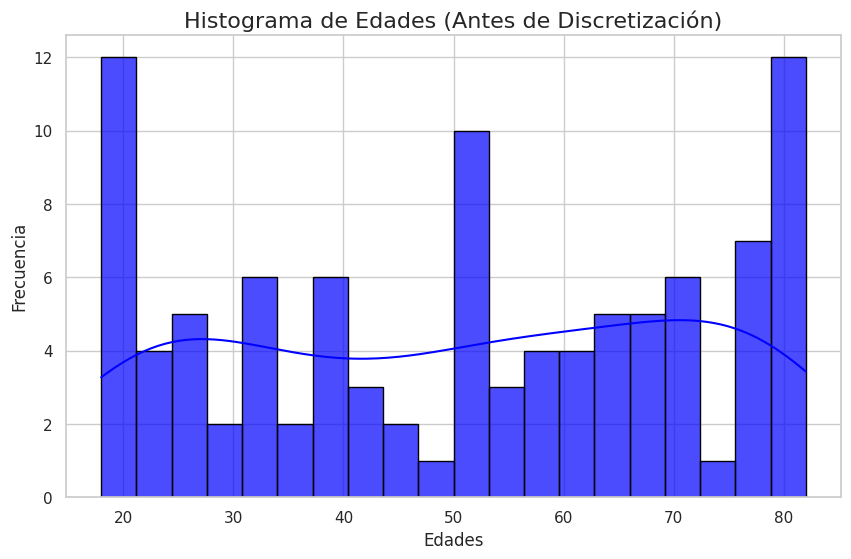

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


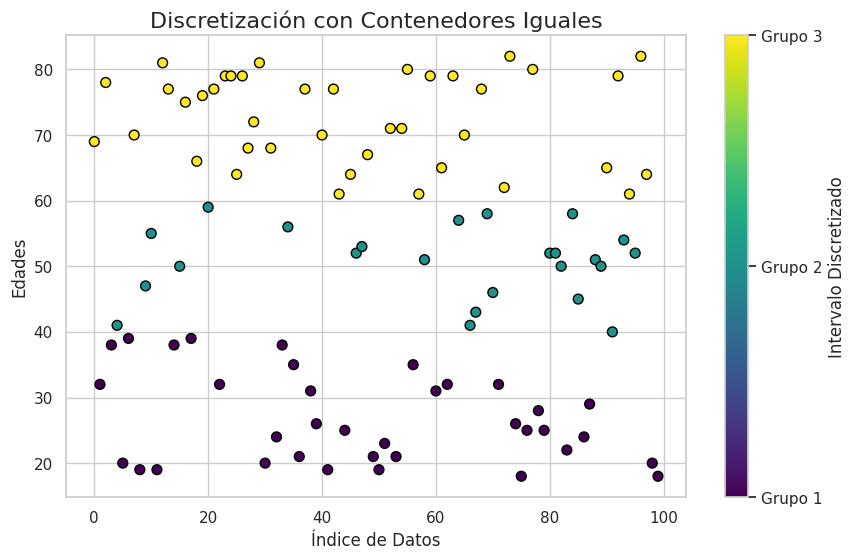

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns

# Configurar el estilo de Seaborn para el fondo
sns.set(style="whitegrid")

# Datos de ejemplo (edades)
np.random.seed(42)
edades = np.random.randint(18, 85, size=100)

# Visualizar histograma de edades antes de la discretización
plt.figure(figsize=(10, 6))
sns.histplot(edades, bins=20, color='blue', alpha=0.7, edgecolor='black', kde=True)
plt.xlabel('Edades', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma de Edades (Antes de Discretización)', fontsize=16)
plt.show()

# Reshape para que sea una matriz 2D y configuración de discretizador
edades_reshape = edades.reshape(-1, 1)
discretizador = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
edades_discretizadas = discretizador.fit_transform(edades_reshape).flatten()  # Aplanar para color mapping

# Visualizar los resultados de la discretización con contenedores iguales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(range(len(edades)), edades, c=edades_discretizadas, cmap='viridis', edgecolor='black', s=50)
plt.colorbar(scatter, label='Intervalo Discretizado', ticks=[0, 1, 2], format=plt.FuncFormatter(lambda x, _: f'Grupo {int(x+1)}'))
plt.xlabel('Índice de Datos', fontsize=12)
plt.ylabel('Edades', fontsize=12)
plt.title('Discretización con Contenedores Iguales', fontsize=16)
plt.grid(True)  # Añadir cuadrícula
plt.show()

**Explicación:**

El código es similar al ejemplo anterior, pero aquí estamos aplicando la discretización con contenedores iguales utilizando el parámetro `strategy='uniform'` en `KBinsDiscretizer`.

**Resultado:**

Verás dos gráficos: el primero muestra el histograma de edades antes de la discretización, y el segundo muestra un gráfico de dispersión donde las edades se han discretizado en tres intervalos iguales. La coloración de los puntos en el segundo gráfico indica en qué intervalo se encuentra cada edad después de la discretización.

La discretización con contenedores iguales es útil cuando queremos dividir los valores en intervalos de tamaño uniforme y crear categorías equidistantes.

## **Discretización con contenedores desiguales**

La discretización con contenedores desiguales, también conocida como discretización con bordes desiguales, es un enfoque en el cual dividimos el rango de valores de una variable continua en intervalos de diferentes tamaños. A diferencia de la discretización con contenedores iguales, aquí los intervalos pueden tener anchos diferentes y estar diseñados para capturar mejor la distribución de los datos.

**Ejemplo de Discretización con Contenedores Desiguales y Gráficas:**

Vamos a utilizar nuevamente el conjunto de datos de edades para mostrar cómo funciona la discretización con contenedores desiguales.

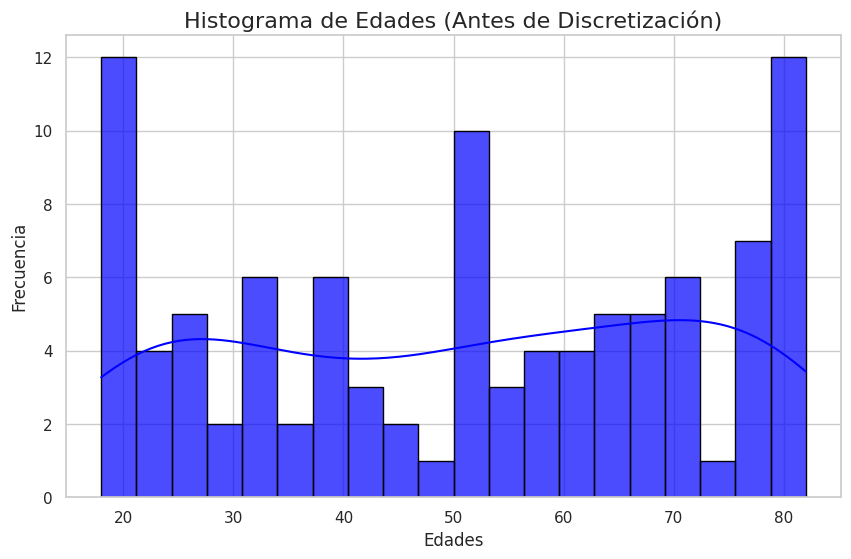

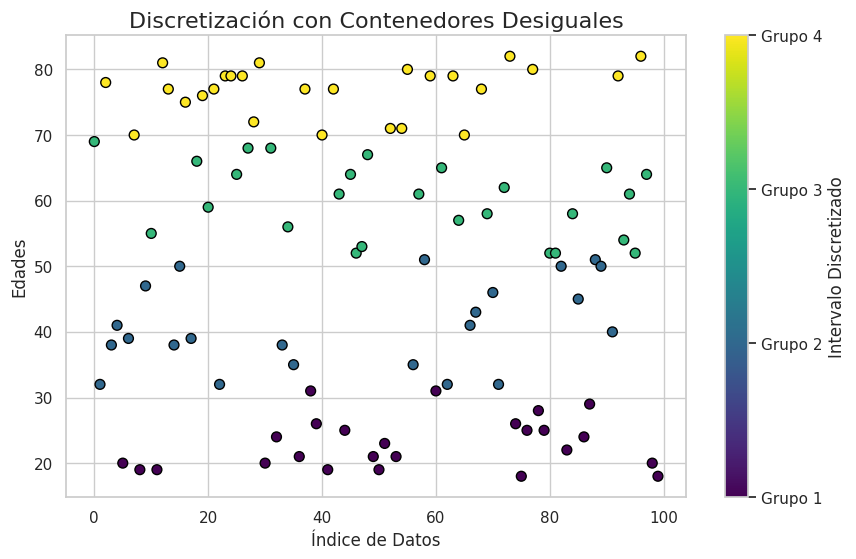

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns

# Configurar el estilo de Seaborn para el fondo
sns.set(style="whitegrid")

# Datos de ejemplo (edades)
np.random.seed(42)
edades = np.random.randint(18, 85, size=100)

# Visualizar histograma de edades antes de la discretización
plt.figure(figsize=(10, 6))
sns.histplot(edades, bins=20, color='blue', alpha=0.7, edgecolor='black', kde=True)
plt.xlabel('Edades', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma de Edades (Antes de Discretización)', fontsize=16)
plt.show()

# Reshape para que sea una matriz 2D y definir bordes desiguales
edades_reshape = edades.reshape(-1, 1)
bordes_desiguales = [18, 30, 40, 60, 85]  # Actualización para mostrar una discretización basada en cuantiles

# Discretizar las edades en intervalos desiguales basados en cuantiles
discretizador = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
edades_discretizadas = discretizador.fit_transform(edades_reshape).flatten()

# Visualizar los resultados de la discretización con contenedores desiguales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(range(len(edades)), edades, c=edades_discretizadas, cmap='viridis', edgecolor='black', s=50)
plt.colorbar(scatter, label='Intervalo Discretizado', ticks=range(4), format=plt.FuncFormatter(lambda x, _: f'Grupo {int(x+1)}'))
plt.xlabel('Índice de Datos', fontsize=12)
plt.ylabel('Edades', fontsize=12)
plt.title('Discretización con Contenedores Desiguales', fontsize=16)
plt.grid(True)  # Añadir cuadrícula
plt.show()

**Explicación:**

1. Creamos un conjunto de datos de edades aleatorias y visualizamos el histograma para mostrar cómo se distribuyen las edades antes de la discretización.

2. Definimos manualmente los bordes desiguales para los intervalos de discretización. En este caso, hemos definido los bordes `[18, 30, 40, 60, 85]` para dividir las edades en cuatro intervalos desiguales.

3. Usamos `KBinsDiscretizer` con la estrategia `'uniform'` y proporcionamos los bordes desiguales en `bin_edges` para realizar la discretización.

4. Creamos un gráfico de dispersión similar al ejemplo anterior para visualizar cómo se han discretizado las edades en intervalos desiguales.

**Resultado:**

Verás dos gráficos: el primero muestra el histograma de edades antes de la discretización, y el segundo muestra un gráfico de dispersión donde las edades se han discretizado en intervalos desiguales. La coloración de los puntos en el segundo gráfico indica en qué intervalo se encuentra cada edad después de la discretización.

La discretización con contenedores desiguales es útil cuando queremos capturar mejor la distribución de los datos y crear categorías con diferentes anchos para reflejar las características del conjunto de datos.

| **Inicio** | **atrás 14** | **Siguiente 16** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./14_%20Datos_Anomalos.ipynb)| [⏩](./16_manejar_Datos_Valores_Faltantes%20.ipynb)|